1. country with the highest rating?
2. month with the highest rating?
3. highest rating by country and month.
4. mean rating by location.
5. yearly rating by location.
6. reviews over time.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import dateutil.parser

In [2]:
disney =  pd.read_csv("C:\\Users\\Yahdii\\Downloads\\DisneylandReviews.csv", encoding_errors = 'replace', index_col = 'Branch')
disney

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text
Branch,,,,,
Disneyland_HongKong,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...
Disneyland_HongKong,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...
Disneyland_HongKong,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...
Disneyland_HongKong,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...
Disneyland_HongKong,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1..."
...,...,...,...,...,...
Disneyland_Paris,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...
Disneyland_Paris,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...
Disneyland_Paris,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...


In [3]:
#fill missing values in the Year column and convert to date time
disney['Year_Month'] = disney.Year_Month.replace({'missing': np.nan})
disney['Year_Month'] = pd.to_datetime(disney['Year_Month'])
disney['Year_Month'].fillna(method = 'ffill')
disney['Year_Month'].value_counts()

2015-08-01    786
2015-07-01    759
2015-12-01    701
2015-06-01    692
2015-05-01    678
             ... 
2010-08-01      7
2010-05-01      4
2019-05-01      2
2010-03-01      2
2010-04-01      1
Name: Year_Month, Length: 111, dtype: int64

Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: Branch, dtype: int64


<AxesSubplot:xlabel='Branch', ylabel='Rating'>

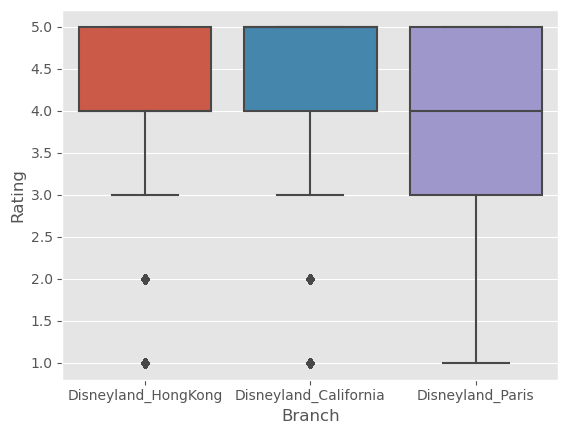

In [4]:
#count of ratings
disney.head()

num_ratings = disney.index.value_counts()
print(num_ratings)
plt.style.use('ggplot')
sns.boxplot(x= disney.index, y = disney['Rating'], data = disney)


In [5]:
#all the branches have gotten ratings from 1-5 at different points
disney[disney.Rating >= 1].index.unique() #'HongKong, California, Paris'

Index(['Disneyland_HongKong', 'Disneyland_California', 'Disneyland_Paris'], dtype='object', name='Branch')

In [6]:
#ratings over the years
range_of_review = disney.Year_Month.max() - disney.Year_Month.min()
range_of_review #the review covers 3348 days or approx 9 years


Timedelta('3348 days 00:00:00')

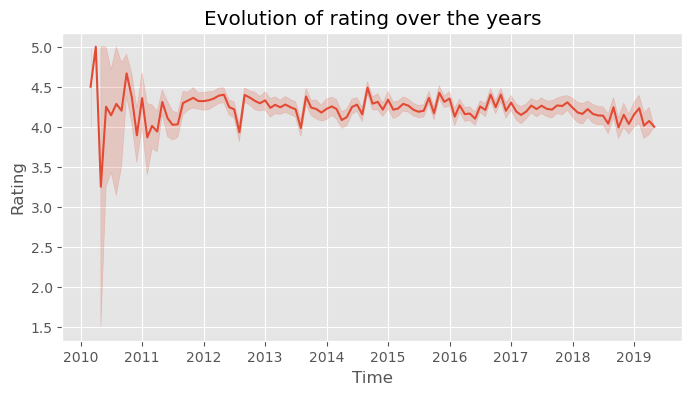

In [7]:
#ratings
disney['Year'] = disney['Year_Month'].dt.year
disney
disney_year = disney.copy()
disney_year = disney_year.reset_index()
disney_year
#line plot
plt.figure(figsize=(8,4))
sns.lineplot(x = ("Year_Month"), y = 'Rating', data=disney_year)
plt.title('Evolution of rating over the years')
plt.ylabel('Rating')
plt.xlabel('Time')
plt.show()

In [8]:
disney

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Year
Branch,,,,,,
Disneyland_HongKong,670772142,4,2019-04-01,Australia,If you've ever been to Disneyland anywhere you...,2019.0
Disneyland_HongKong,670682799,4,2019-05-01,Philippines,Its been a while since d last time we visit HK...,2019.0
Disneyland_HongKong,670623270,4,2019-04-01,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,2019.0
Disneyland_HongKong,670607911,4,2019-04-01,Australia,HK Disneyland is a great compact park. Unfortu...,2019.0
Disneyland_HongKong,670607296,4,2019-04-01,United Kingdom,"the location is not in the city, took around 1...",2019.0
...,...,...,...,...,...,...
Disneyland_Paris,1765031,5,NaT,United Kingdom,i went to disneyland paris in july 03 and thou...,NaN
Disneyland_Paris,1659553,5,NaT,Canada,2 adults and 1 child of 11 visited Disneyland ...,NaN
Disneyland_Paris,1645894,5,NaT,South Africa,My eleven year old daughter and myself went to...,NaN


In [27]:
disney_ = disney.reset_index()
disney_

cols = ['Branch', 'Rating', 'Year']
new = disney_[cols]
new

,Branch,Rating,Year
0,Disneyland_HongKong,4,2019.0
1,Disneyland_HongKong,4,2019.0
2,Disneyland_HongKong,4,2019.0
3,Disneyland_HongKong,4,2019.0
4,Disneyland_HongKong,4,2019.0
...,...,...,...
42651,Disneyland_Paris,5,NaN
42652,Disneyland_Paris,5,NaN
42653,Disneyland_Paris,5,NaN
42654,Disneyland_Paris,4,NaN


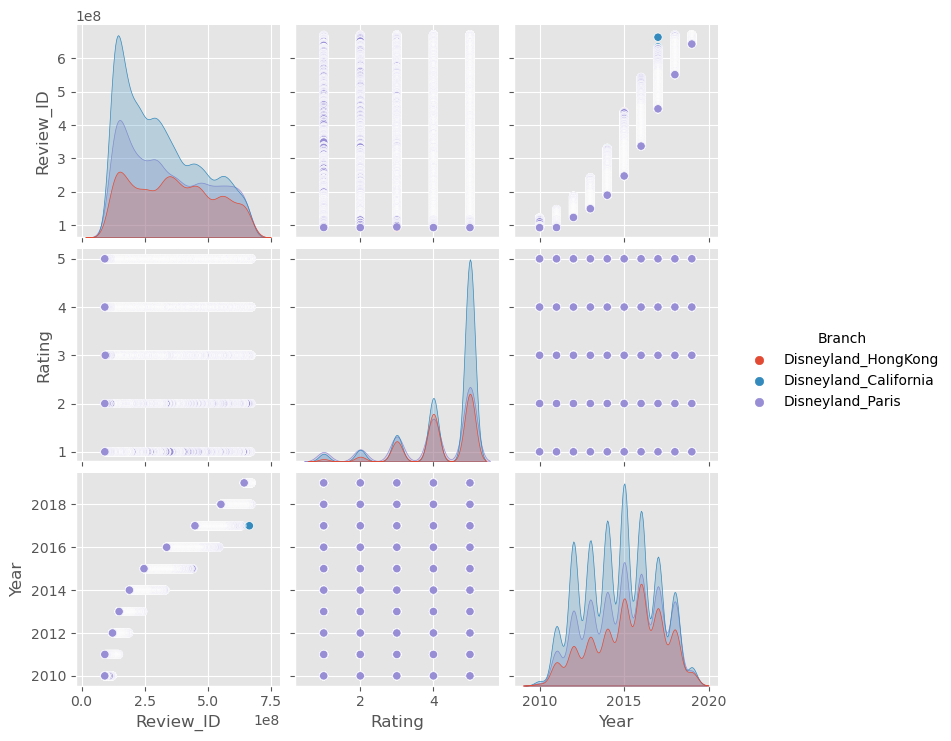

In [28]:
new = disney_.dropna(axis = 0, how = 'any')

sns.pairplot(new, hue='Branch')
#disney_

In [17]:
disney_

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris
